In [1]:
import os
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import rubin_sim.maf as maf

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/runComparison/runComparison.py:22: UserWarning: 
The generateDiffHtml method requires bokeh to be installed
but it is not needed to use the other methods in this class.
Run: pip install bokeh then restart your jupyter notebook kernel.
  warnings.warn('\n'+'The generateDiffHtml method requires bokeh to be installed'+'\n'+


In [3]:
opsim = 'galfp_v1.8_10yrs'
opsdb = maf.db.OpsimDatabase('wfd_' + opsim + '.db')

In [4]:
metric = maf.metrics.CountMetric('observationStartMJD')
nside = 32
slicer = maf.slicers.HealpixSlicer(nside=nside)
filterlist, colors, orders, sqls, metadata = maf.batches.filterList(extraSql='note not like "%DD%"')

nvisits = {}
for f in filterlist:
    nvisits[f] = maf.MetricBundle(metric, slicer, sqls[f], metadata=metadata[f],
                                  plotDict = {'color': colors[f]},
                                  runName=opsim, summaryMetrics=maf.batches.extendedSummary())

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


In [5]:
outDir = 'nvisits'
g = maf.MetricBundleGroup(nvisits, opsdb, outDir=outDir)
g.runAll()

Querying database observations with constraint note not like "%DD%" for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 1955597 visits
Running:  ['all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint (note not like "%DD%") and (filter = "z") for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 387715 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint (note not like "%DD%") and (filter = "u") for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 130225 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint (note not like "%DD%") and (filter = "g") for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 207540 visits
Running:  ['g']
Comple

In [7]:
pd.DataFrame([nvisits[f].summaryValues for f in filterlist], index=filterlist)

,Mean,Rms,Median,Max,Min,N(+3Sigma),N(-3Sigma),Count,25th%ile,75th%ile
all,663.606194,262.930025,852.0,941.0,1.0,0,0,8654,401.0,873.0
u,47.109946,15.103693,55.0,73.0,1.0,0,48,8104,35.0,58.0
g,70.608196,21.253052,73.0,189.0,1.0,168,99,8614,64.0,77.0
r,148.039070,56.040163,187.0,209.0,1.0,0,0,8600,104.0,191.0
i,147.870172,57.163496,188.0,222.0,1.0,0,0,8596,104.0,192.0
z,132.633931,53.227346,170.0,197.0,1.0,0,0,8594,95.0,174.0
y,131.589017,65.332118,178.0,218.0,1.0,0,0,8122,52.0,183.0


In [56]:
# Read in the goal footprint
footprint = np.load('survey_footprint_32.npz')

goal = np.zeros(len(footprint['u']))
for f in filterlist:
    if f == 'all':
        continue
    goal += footprint[f]

normalization = goal.sum() / nvisits['all'].metricValues.sum()
goal = goal / normalization
print(normalization, goal.sum(), goal.max())
goals = {}
goals['all'] = goal
for f in filterlist:
    if f == 'all':
        continue
    goals[f] = footprint[f] / normalization
    print(f, goals[f].max(), footprint[f].max())

0.005215036989694163 5742848.0 969.4814062838651
u 61.012379933373786 0.3181818181818182
g 174.85911356566558 0.9118967452300784
r 192.21485684761754 1.0024075884290937
i 192.21485684761754 1.0024075884290937
z 174.85911356566558 0.9118967452300784
y 174.32108552392512 0.9090909090909092


In [57]:
temp = maf.createEmptyMetricBundle()
temp.slicer = maf.HealpixSlicer(nside)
temp.metricValues = ma.MaskedArray(data=goals['all'], 
                                   mask=nvisits['all'].metricValues.mask.copy())

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


1

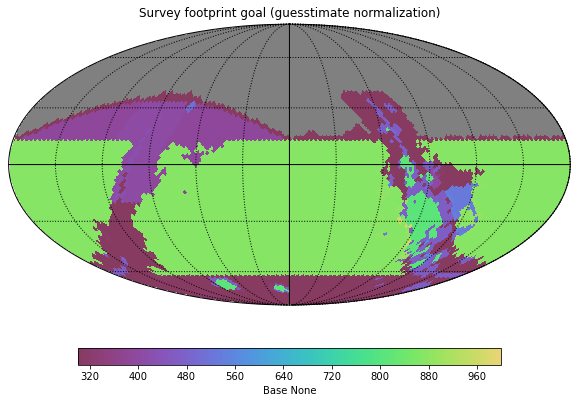

In [58]:
ph = maf.PlotHandler(outDir=outDir, thumbnail=False, figformat='png')
ph.setMetricBundles([temp])
plotDict = {'colorMin': 300, 'colorMax': 1000, 'figsize': (8, 6), 
            'title': 'Survey footprint goal (guesstimate normalization)'}
ph.plot(plotFunc=maf.plots.HealpixSkyMap(), plotDicts=plotDict)

/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


1

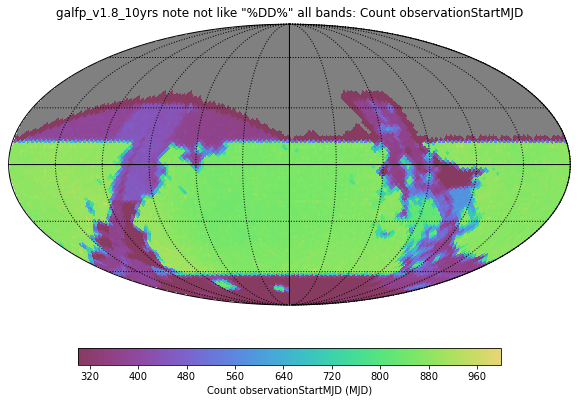

In [59]:
ph = maf.PlotHandler(outDir=outDir, thumbnail=False, figformat='png')
ph.setMetricBundles([nvisits['all']])
plotDict = {'colorMin': 300, 'colorMax': 1000, 'figsize': (8, 6)}
ph.plot(plotFunc=maf.plots.HealpixSkyMap(), plotDicts=plotDict)

/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/lynnej

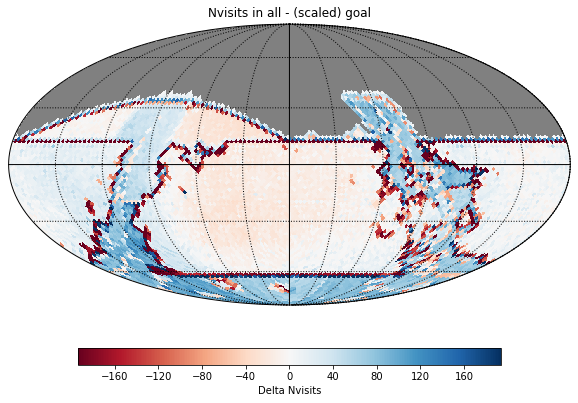

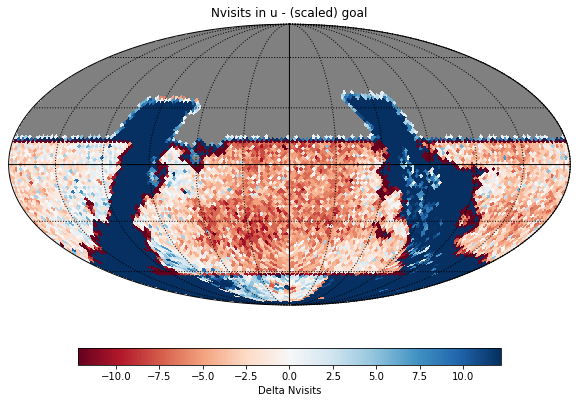

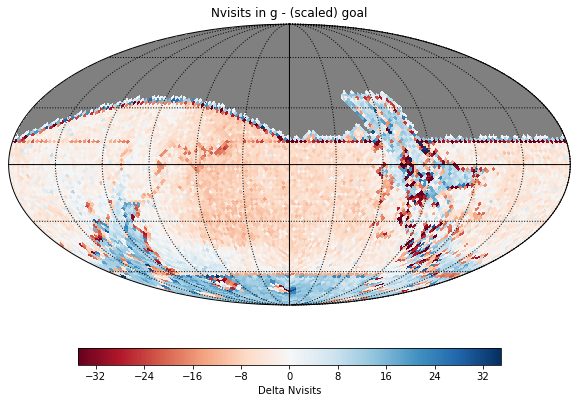

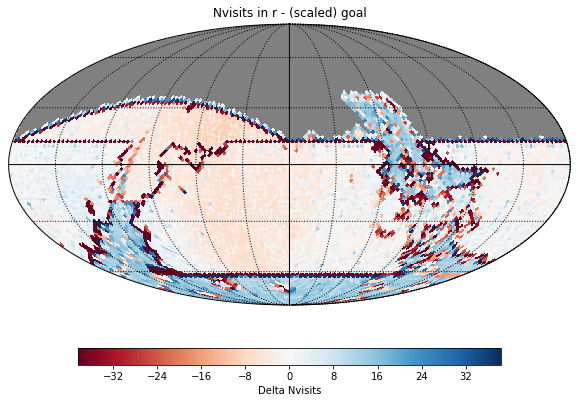

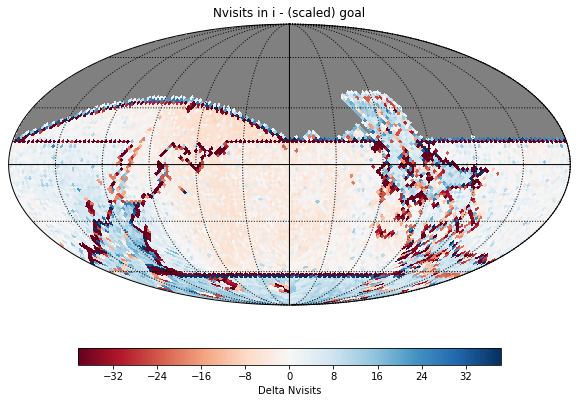

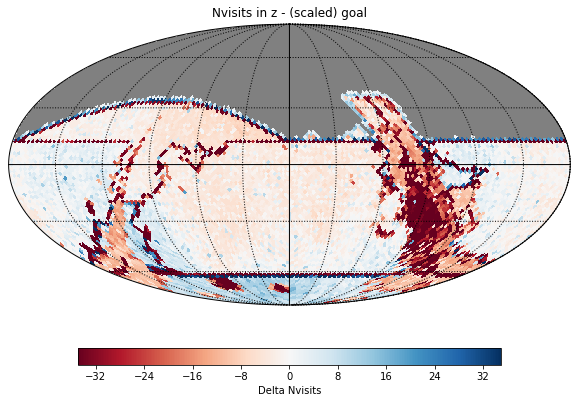

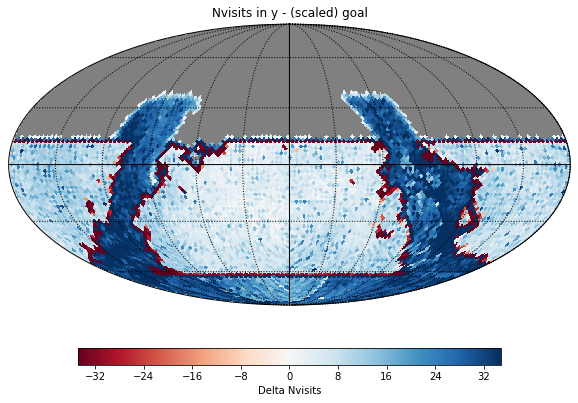

In [63]:
for f in filterlist:
    temp.metricValues = (nvisits[f].metricValues - goals[f])

    ph = maf.PlotHandler(outDir=outDir, thumbnail=False, figformat='png')
    ph.setMetricBundles([temp])
    lims = goals[f].max() * .2
    plotDict = {'colorMin': -lims, 'colorMax': lims, 'figsize': (8, 6), 'cmap':'RdBu',
               'xlabel': "Delta Nvisits", 'title': f"Nvisits in {f} - (scaled) goal"}
    ph.plot(plotFunc=maf.plots.HealpixSkyMap(), plotDicts=plotDict)